In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

%matplotlib inline

df = pd.read_csv('base_gastos_cartao.csv')
df.columns

Index(['Gastos_Cartao', 'Idade', 'Renda', 'Impostos', 'Segmento'], dtype='object')

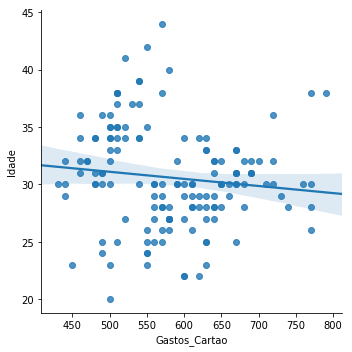

In [44]:
sns.lmplot("Gastos_Cartao", "Idade", df)

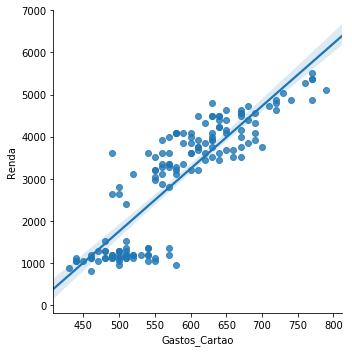

In [45]:
sns.lmplot("Gastos_Cartao", "Renda", df)

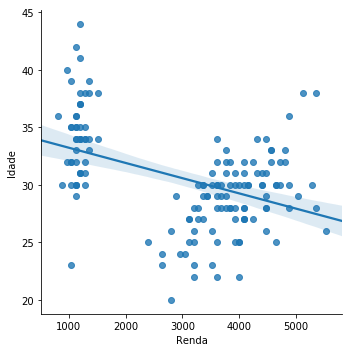

In [46]:
sns.lmplot("Renda", "Idade", df)

In [47]:
segmentos = df["Segmento"].unique()
segmentos

array(['C', 'B', 'A'], dtype=object)

In [48]:
def mapear_serie(segmento):
    dict_gen = {}
    serie_aux = []
    serie_aux = segmento.unique()
  
    i = 0
    
    for n in serie_aux:
        dict_gen[n] = i
        i = i+1
    
    return dict_gen

dict_aux = mapear_serie(df["Segmento"])

In [49]:
df["Segmento"].replace(dict_aux, inplace=True)
df.head(5)

,Gastos_Cartao,Idade,Renda,Impostos,Segmento
0,510,35,1120,60,0
1,490,30,1120,60,0
2,470,32,1040,60,0
3,460,31,1200,60,0
4,500,36,1120,60,0


In [50]:
colunas = ["Gastos_Cartao", "Idade","Renda", "Impostos"]
x = df[colunas]
y = df["Segmento"]

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.30, random_state=432)
        

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

In [53]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor(random_state=432)

dtr_model.fit(x_train, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=432, splitter='best')

In [54]:
pontuacao(dtr_model, x_test, y_test.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=432, splitter='best') R2 score: 0.93


In [59]:
testar = [[515,36,1220,80],
          [600,28,3000,490], 
          [650,31,5000,500]]

resultado = dtr_model.predict(testar)

for n in resultado:
    print("Predicao: ", n , " - segmento: ", segmentos[int(n)])


Predicao:  0.0  - segmento:  C
Predicao:  1.0  - segmento:  B
Predicao:  2.0  - segmento:  A
